In [9]:
import cv2
import numpy as np
from numpy.linalg import norm
import sys
import os
import json
#自定义类
from plates_split_utils.plates_split import plates_split

In [10]:
shape=32
plate_path="./plates_image/5_2.jpg"
color_mark=int(os.path.split(plate_path)[-1][:-4][-1])
img=cv2.imread(plate_path,0)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
'''实例初始化'''
plates_split=plates_split.initialize(plate_path,shape)

'''
实现功能：
1. canny查找边界
2. 查找external轮廓
3. 根据contour查找convexhull
4. 过滤不符合位置和尺寸的convexhull
5. 把剩下的hull按照x轴排序
'''
rects=plates_split.find_external_convexHull()

'''
实现功能：
合并粘连框
'''
rects=plates_split.filter_rects(rects)

'''
实现功能：
对多框少框做处理
'''
rects=plates_split.adjust_rects(rects,color_mark)

'''
实现功能：
由于中文字符一般比别的字母要宽，而且中文有的有左右偏旁，有可能方框会从中间把中文分开，所以这里对中文字符进行宽度加长处理
'''
rects=plates_split.adjust_chinese(rects)

'''
实现功能：
字符分割
字符填充边界
'''
characters=plates_split.plate_split(rects)
len(characters)

8

In [12]:
import matplotlib.pyplot as plt

def plot_characters(characters):
    
    fig, axes = plt.subplots(1, len(characters), figsize=(12, 3*len(characters)),
                         subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(characters[i], cmap='bone')
    plt.show()

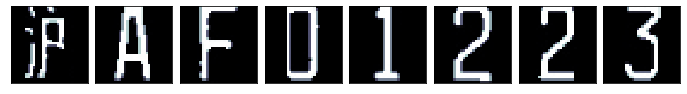

In [13]:
plot_characters(characters)